In [8]:
import numpy as np

In [9]:
%%writefile geoparam.py

import numpy as np

#Known variables

pa = 1e5    #mean pressure (Pa)
pb = 200.   #magnitude of pressure variations (Pa)
f = 1e-4    #Coriolis parameter
rho = 1.    #density
L = 2.4e6   #length scale of pressure variations (k)
ymin = 0.0  # minimum space dimention
ymax = 1e6  # max space dimention

def pres(y):
    "formula for finding the pressure at a location y"
    return pa + pb*np.cos(y*np.pi/L)

def uexact(y):
    "analytic solution for the geostrophic wind at location y"

    return pb*np.pi/(rho*f*L)*np.sin(y*np.pi/L)

def geowind(dpdy):
    "geostrophic wind as a function of the pressure gradient"
    
    return -dpdy/(rho*f)

Overwriting geoparam.py


In [10]:
%%writefile diff2.py

import numpy as np

#function to differentiate a given input

def diff2(f, dx):
    "Numerically differentiating the function f, with points\
    a distance dx apart, and using a 2 point taylor approximated\
    difference"
    
    #initalising the output's array of the gradient to be
    #the same size as the array of the input function f
    
    dfdx = np.zeros_like(f)
    
    #2 point forward difference method at start point => first order
    dfdx[0] = (f[1] - f[0])/dx
    
    #2 point backward difference method at end point => first order
    dfdx[-1] = (f[-1] - f[-2])/dx
    
    #2 point centred difference for rest of points => second order
    
    for i in range(1, len(f)-1):
        dfdx[i] = (f[i+1] - f[i-1])/(2*dx)
        
    return dfdx

Writing diff2.py


In [11]:
%%writefile geostwind.py

import numpy as np
import matplotlib.pyplot as plt

from diff2 import *

def geostwind():
    
    "Numerically differentiate pressure function to calculate the\
    geostrophic wind relation using 2 point differences, compare and\
    plot against the analytic solution, and plots log graph of errors"
    
    import geoparam as gp
    
    #set resolution:
    
    #N is the number of intervals the space will be divided into
    
    #Note this code runs over a range of values for N (from 5 to 30), 
    #and the required N = 10 for this assignment is the 2nd output plot
    
    
    ###check dy behaves as expected using small ymax and N
        
    for Nc in range(1, 4):
        for ymaxc in range(1, 5):
        
            dyc = (ymaxc - gp.ymin)/Nc
            print('at N =', Nc, 'and ymax =', ymaxc, 'checked dy =', dyc)
    
    for N in range(4,30,5):
        
        #check that N and ymax are not too small
        #if N too small: dividing by zero
        
        if abs(N) < 1e-6:
            break
            
        #if ymax too close to ymin, dy will end up being zero
        
        if abs(gp.ymax) < abs(gp.ymin):
            break
            
    #dy is the step size

        dy = (gp.ymax - gp.ymin)/N
        
        
        #y is the spatial dimention

        y = np.linspace(gp.ymin, gp.ymax, N+1)
        
        #uexact (pressure gradient) is the analytical solution for 
        #geostrophic wind

        uexact = gp.uexact(y)
        
        #pressure at each point y(i)
        
        p = gp.pres(y)
        
        #the calculated numerical pressure gradient and wind 

        dpdy = diff2(p, dy)
        
        ucentre = gp.geowind(dpdy)

        uerror = abs(uexact - ucentre)
        
        
        #graph of numerical vs analytic solutions

        fg1 = plt.figure(figsize=[6,4])
        font = {'size': 12}
        plt.rc('font', **font)
        plt.plot(y/1000, ucentre, '*r--', label='two-point differences',
                 ms=12, markeredgewidth=1.5, markerfacecolor='none')
        plt.plot(y/1000, uexact, 'k-', label='Exact')
        plt.title(r'differentiating $u$ $=$ $\frac{1}{\rho f}$ $\frac{dp}{dy}$',
                  y=1.01)
        plt.legend(loc='best')
        plt.xlabel('y km')
        plt.ylabel('u m/s')
        plt.tight_layout()
        plt.savefig('Plots/geowindcent.pdf')
        plt.show()
        
        #logarithmic plot of error between analytic and numerical

        fg2 = plt.figure(figsize=[6,4])
        font = {'size': 12}
        plt.rc('font', **font)
        plt.loglog(y/1000, uerror, 'b-', label='Error')
        plt.title(r'Error from numerically differentiating $u$ $=$ $\frac{1}{\rho f}$ $\frac{dp}{dy}$',y=1.01)
        plt.legend(loc='best')
        plt.xlabel('y km')
        plt.ylabel('absolute error km')
        plt.ylim((10e-6,1))  #to compare all outputs on same scale
        plt.tight_layout()
        plt.savefig('Plots/geowindcenterr.pdf')
        plt.show()
    
if __name__ == "__main__":
    geostwind()

Writing geostwind.py


at N = 1 and ymax = 1 checked dy = 1.0
at N = 1 and ymax = 2 checked dy = 2.0
at N = 1 and ymax = 3 checked dy = 3.0
at N = 1 and ymax = 4 checked dy = 4.0
at N = 2 and ymax = 1 checked dy = 0.5
at N = 2 and ymax = 2 checked dy = 1.0
at N = 2 and ymax = 3 checked dy = 1.5
at N = 2 and ymax = 4 checked dy = 2.0
at N = 3 and ymax = 1 checked dy = 0.3333333333333333
at N = 3 and ymax = 2 checked dy = 0.6666666666666666
at N = 3 and ymax = 3 checked dy = 1.0
at N = 3 and ymax = 4 checked dy = 1.3333333333333333


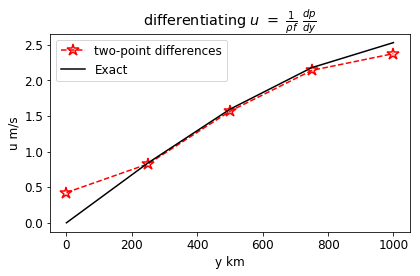

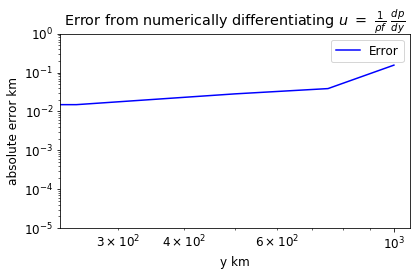

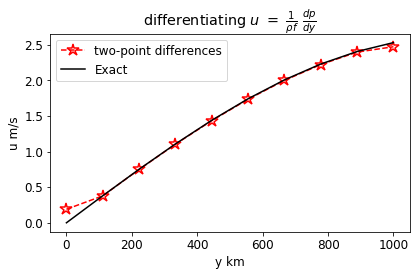

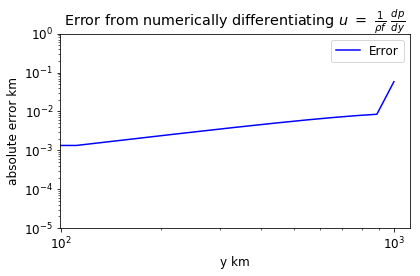

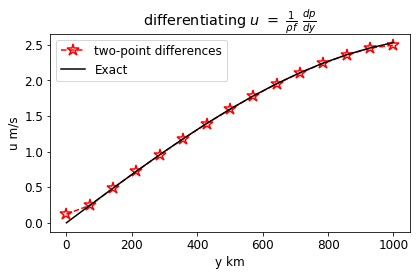

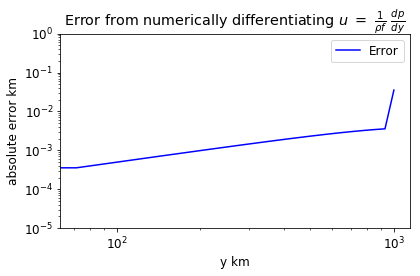

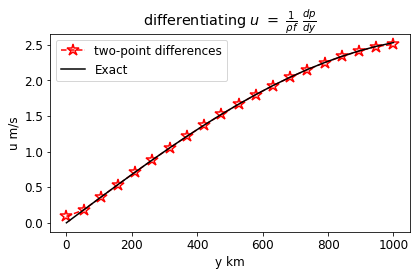

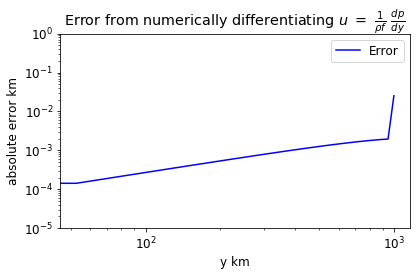

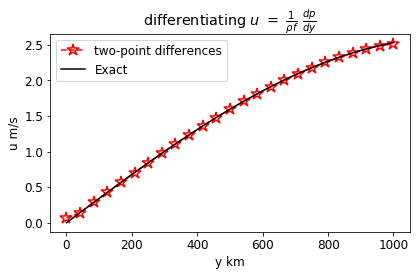

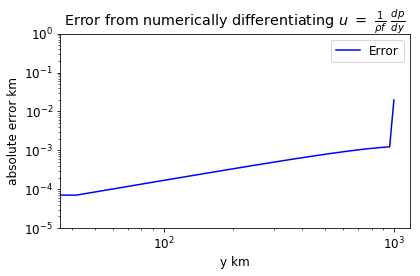

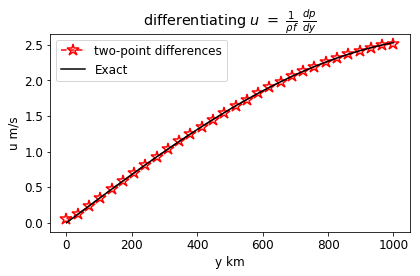

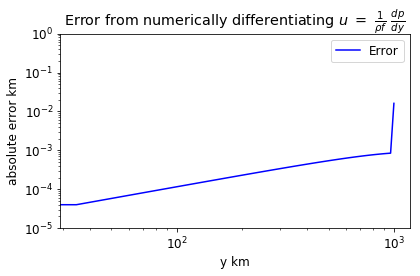

In [12]:
%matplotlib inline

%run geostwind

In [16]:
%%writefile diff4.py

import numpy as np

#function to differentiate a given input

def diff4(f, dx):
    
    dfdx = np.zeros_like(f)
    
    #start points
    dfdx[0] = (4*f[1] - 3*f[0] - f[2])/(2*dx)             #3 point forward => 2nd order
    dfdx[1] = (6*f[2] - f[3] - 3*f[1] - 2*f[0])/(6*dx)      #4 point forward => 3rd order
    
    #end points
    dfdx[-1] = (3*f[-1] - 4*f[-2] + f[-3])/(2*dx)          #3 point backward => 2nd order
    dfdx[-2] = (2*f[-1] + 3*f[-2] - 6*f[-3] + f[-4])/(6*dx)  #4 point backward => 3rd order

    
    for i in range(2, len(f)-2):

        dfdx[i] = (8*f[i+1] - 8*f[i-1] - f[i+2] + f[i-2])/(12*dx)
        
    return dfdx

Writing diff4.py


In [17]:
%%writefile impgeostwind.py

import numpy as np
import matplotlib.pyplot as plt

from diff4 import *
from diff2 import *



def impgeostwind():
    
    "Numerically differentiate pressure function to calculate the\
    geostrophic wind relation using 2 point differences, compare and\
    plot against the analytic solution, and plots log graph of errors"
    
    import geoparam as gp
    
    #set resolution:
    
    #N is the number of intervals the space will be divided into
    for N in range(4,30,5):
        
        #check that N and ymax are not too small
        #if N too small: dividing by zero
        
        if abs(N) < 1e-6:
            break
            
        #if ymax too close to ymin, dy will end up being zero
        
        if abs(gp.ymax) < abs(gp.ymin):
            break
            
    #dy is the step size

        dy = (gp.ymax - gp.ymin)/N
        
        #y is the spatial dimention

        y = np.linspace(gp.ymin, gp.ymax, N+1)
        
        #uexact (pressure gradient) is the analytical solution for 
        #geostrophic wind

        uexact = gp.uexact(y)
        
        #pressure at each point y(i)
        
        p = gp.pres(y)
        
        #the calculated numerical pressure gradient and wind 

        dpdy = diff4(p, dy)
        dpdy2pt = diff2(p, dy)
        
        ucentre = gp.geowind(dpdy)
        
        ucentre2pt = gp.geowind(dpdy2pt)

        uerror = abs(uexact - ucentre)
        
        uerror2pt = abs(uexact - ucentre2pt)
        
        
        #graph of numerical vs analytic solutions

        fg1 = plt.figure(figsize=[6,4])
        font = {'size': 12}
        plt.rc('font', **font)
        plt.plot(y/1000, ucentre, '*r--', label='two-point differences',
                 ms=12, markeredgewidth=1.5, markerfacecolor='none')
        plt.plot(y/1000, uexact, 'k-', label='Exact')
        plt.title(r'differentiating $u$ $=$ $\frac{1}{\rho f}$ $\frac{dp}{dy}$',
                  y=1.01)
        plt.legend(loc='best')
        plt.xlabel('y km')
        plt.ylabel('u m/s')
        plt.tight_layout()
        plt.savefig('Plots/impgeowindcent.pdf')
        plt.show()
        
        #logarithmic plot of error between analytic and numerical
        #of both errors from 2nd and 4th orders

        fg3 = plt.figure(figsize=[6,4])
        font = {'size': 12}
        plt.rc('font', **font)
        plt.loglog(y/1000, uerror, 'b-', label='4th order error')
        plt.loglog(y/1000, uerror2pt, 'r-', label='2nd order error')
        plt.title('Difference in error between 2nd and 4th order approx',y=1.01)
        plt.legend(loc='best')
        plt.xlabel('y km')
        plt.ylabel('absolute error km')
        plt.ylim((10e-9,1))  #to compare all outputs on same scale
        plt.tight_layout()
        plt.savefig('Plots/impgeowindcenterr.pdf')
        plt.show()        
        
    
if __name__ == "__main__":
    impgeostwind()

Overwriting impgeostwind.py


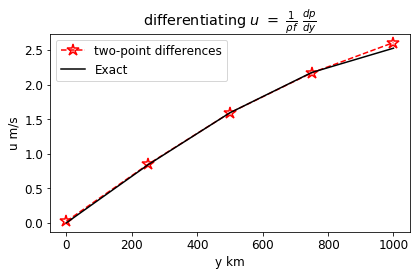

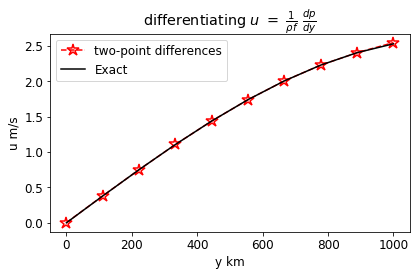

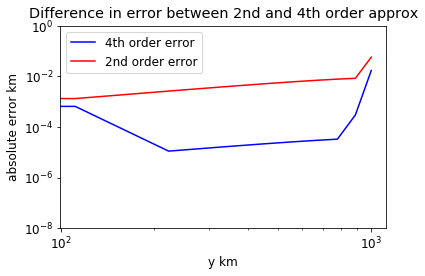

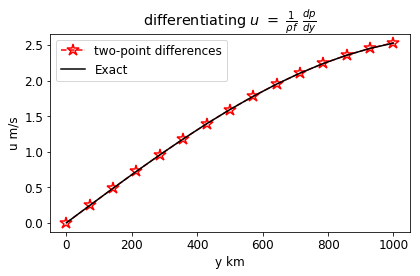

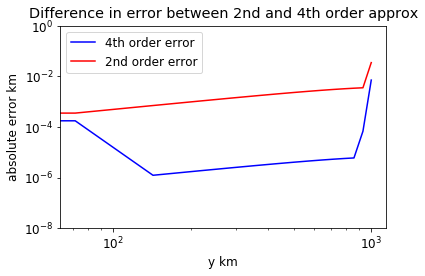

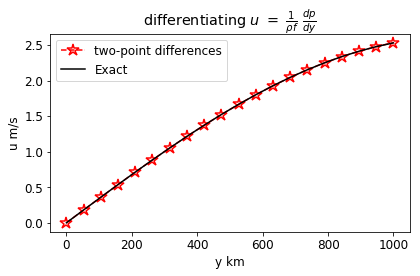

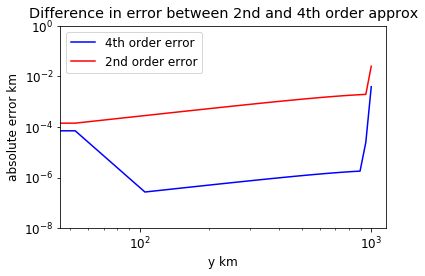

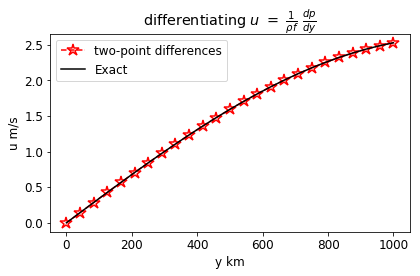

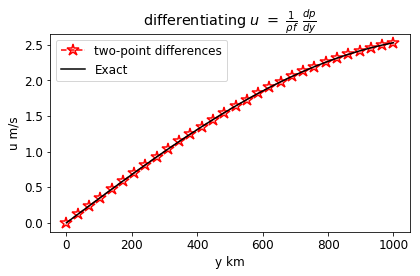

In [18]:
%matplotlib inline

%run impgeostwind